In [73]:
from PIL import Image
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
image_pil = Image.open('tiger.jpg')
image = np.array(image_pil)

In [75]:
image_2 = Image.open('tiger_2.jpg')
image_2 = np.array(image_2)

In [76]:
image = cv2.resize(image, (image_2.shape[1], image_2.shape[0]))

In [77]:
b, g, r = cv2.split(image)

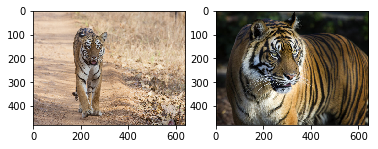

In [78]:
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(image_2)
plt.show()

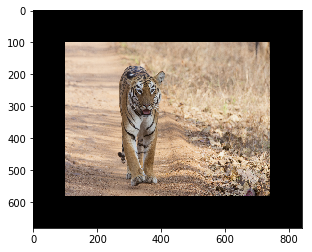

In [79]:
constant = cv2.copyMakeBorder(image, 100, 100, 100, 100, cv2.BORDER_CONSTANT, value=0)

plt.imshow(constant)

## Add Weight to Image

In [81]:
for i in [0, 50, 100, 200]:
    dst = cv2.addWeighted(image, 0.5, image_2, 0.3, i)
    print(dst.shape, np.min(dst), np.max(dst))

(480, 640, 3) 1 196
(480, 640, 3) 51 246
(480, 640, 3) 101 255
(480, 640, 3) 201 255


In [80]:
print(image.shape, np.min(image), np.max(image))
print(image_2.shape, np.min(image_2), np.max(image_2))

(480, 640, 3) 0 249
(480, 640, 3) 0 255


## Converting BGR to HSV

In [84]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv.shape

(480, 640, 3)

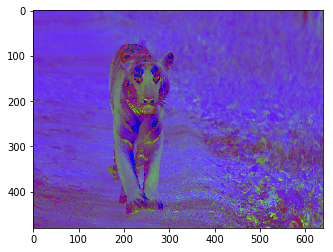

In [85]:
plt.imshow(hsv)
plt.show()

## Convert to Gray

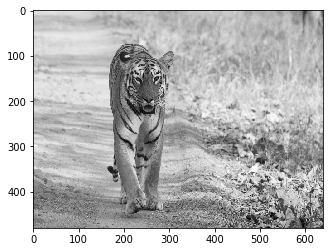

In [86]:
image_bw = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(image_bw, 'gray')
plt.show()

## Thresholding Images

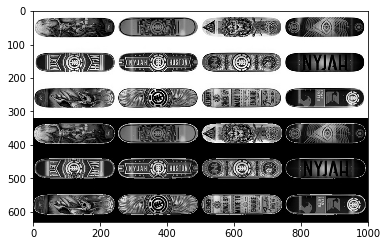

In [104]:
thres_image = Image.open('opencv_source/thresholding_example.jpg').convert('L')
thres_image = np.array(thres_image)

plt.imshow(thres_image, 'gray')
plt.show()

In [109]:
dret, thresh1 = cv2.threshold(thres_image, 127, 255, cv2.THRESH_BINARY)

dret

127.0

In [110]:
np.unique(thresh1)

array([  0, 255], dtype=uint8)

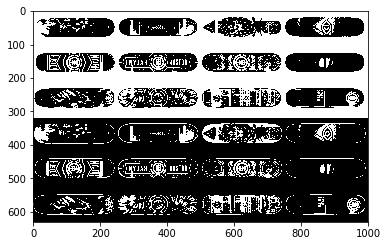

In [111]:
plt.imshow(thresh1, 'gray')
plt.show()

In [270]:
thresh1.shape

(630, 1000)

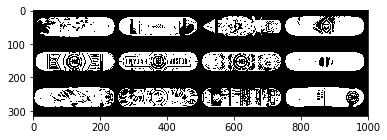

In [294]:
new_img = 255 - thresh1[:315, :]

plt.imshow(new_img, 'gray')
plt.show()

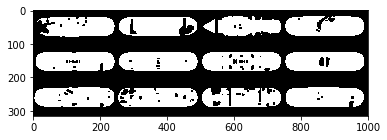

In [295]:
kernel = np.ones((5, 5),np.uint8)

closing = cv2.morphologyEx(new_img, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing, 'gray')
plt.show()

## 연습 문제

넘파이로 Threshold를 만들어 보자 

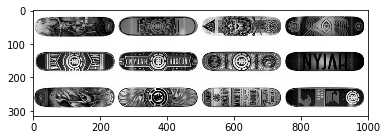

In [299]:
plt.imshow(thres_image[:315], 'gray')
plt.show()

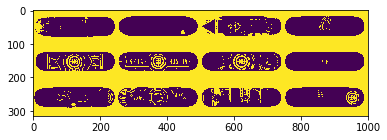

In [301]:
thre_practice = np.where(thres_image[:315] > 175, 1, 0)

plt.imshow(thre_practice)
plt.show()

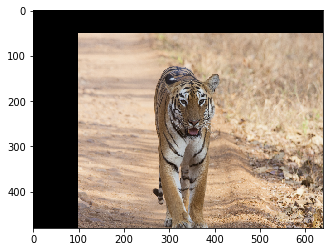

In [113]:
M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

plt.imshow(dst)
plt.show()

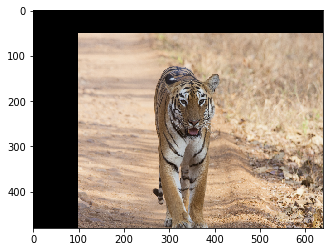

In [303]:
trans_image = np.zeros_like(image)
trans_image[50:, 100:] = image[:-50, :-100]

plt.imshow(trans_image)
plt.show()

## 연습 문제
넘파이로 만들어보자 

In [114]:
rows, cols, ch = image.shape

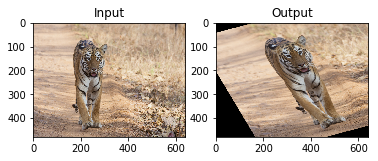

In [116]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(image,M,(cols,rows))

plt.subplot(121),plt.imshow(image),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [117]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [132]:
img = cv2.imread('opencv_source/dog.jpg',0)
img2 = img.copy()
template = cv2.imread('opencv_source/face.jpg',0)
w, h = template.shape[::-1]

In [133]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

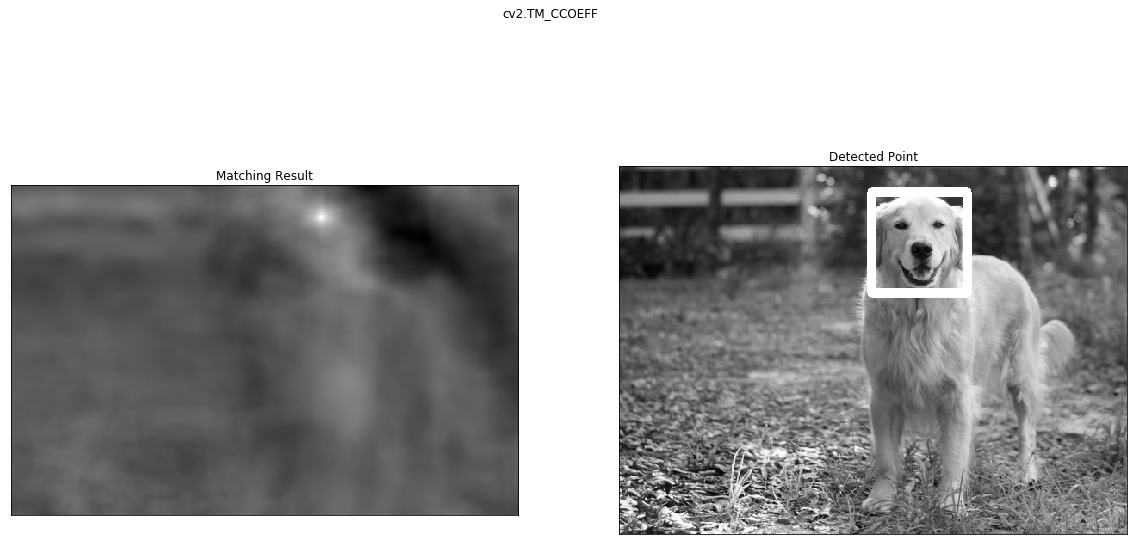

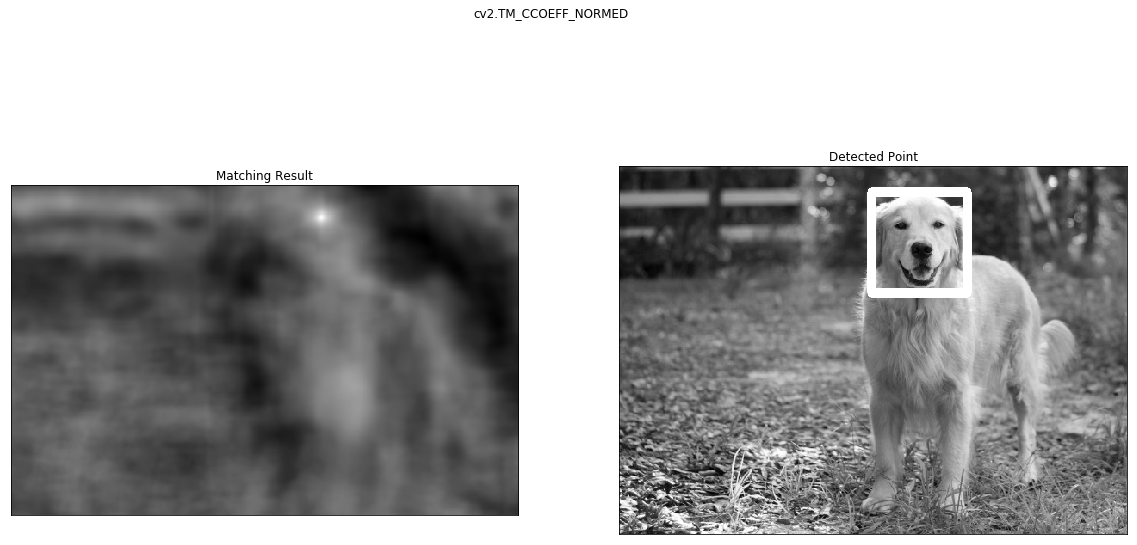

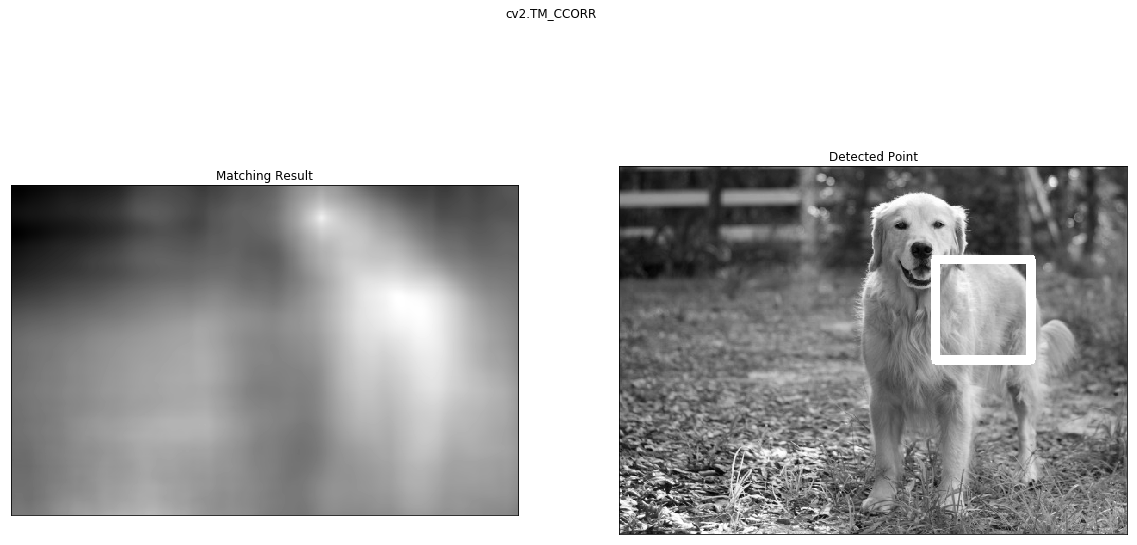

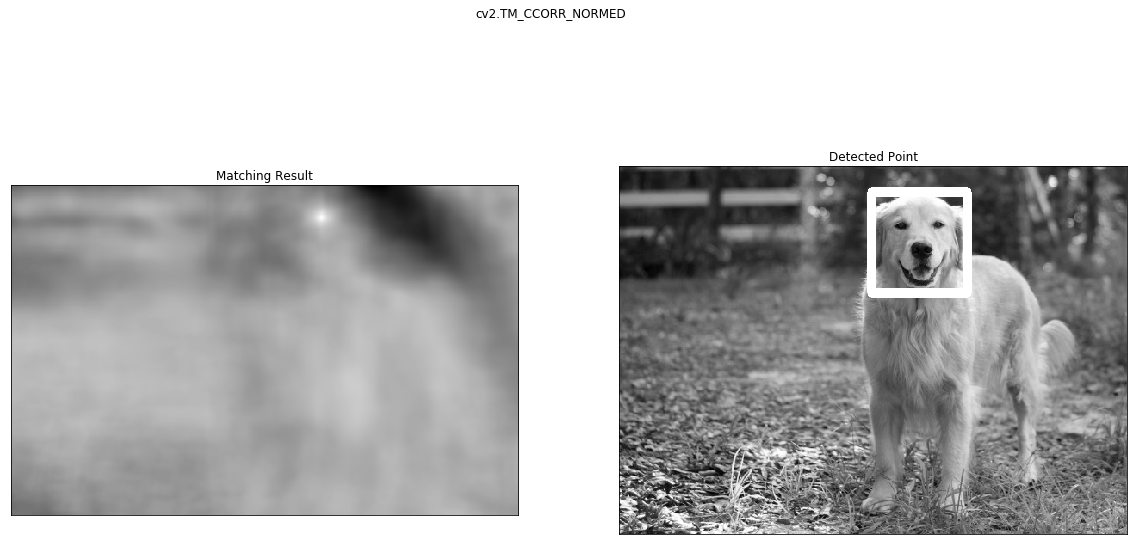

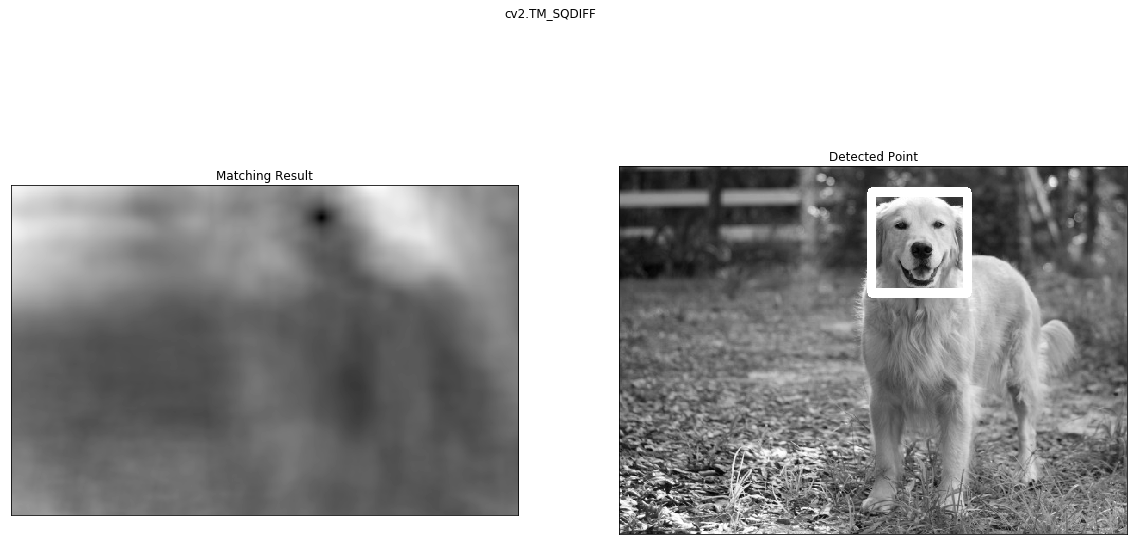

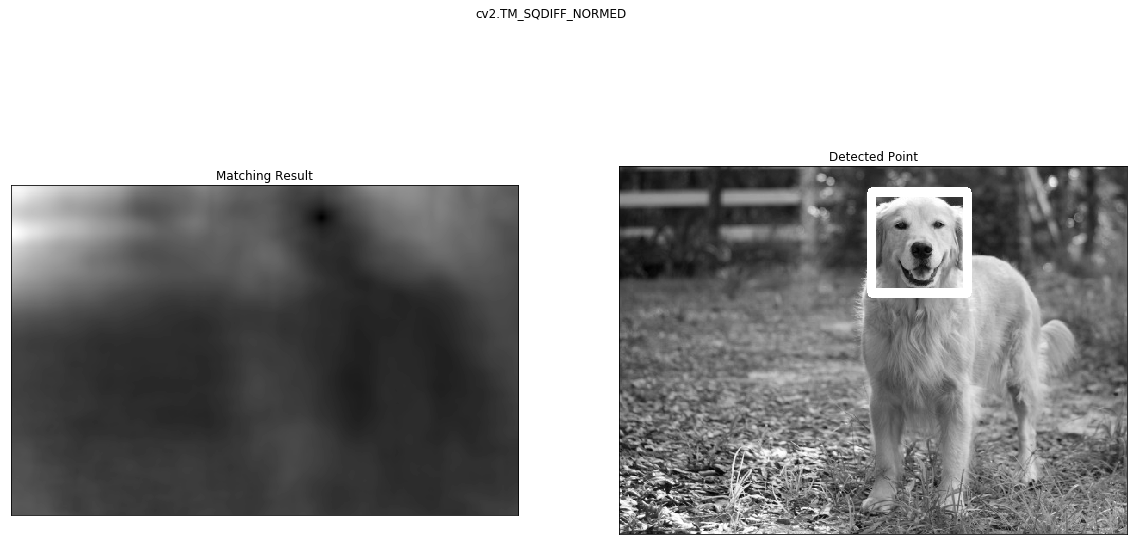

In [134]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 10)

    plt.figure(figsize=(20, 10))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

## Numpy로 template matching을 만들어보자  
np.argmax()를 사용하면 어디가 제일 높은지 찾을 수 있음 

In [267]:
img = cv2.imread('opencv_source/dog.jpg',0)
img2 = img.copy()
template = cv2.imread('opencv_source/face.jpg',0)
w, h = template.shape[::-1]

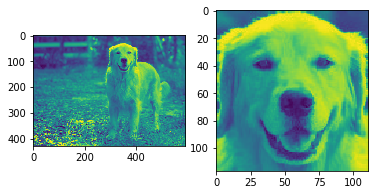

In [268]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(template)
plt.show()

In [244]:
def correlation_coefficient(patch1, patch2):
    product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
    stds = patch1.std() * patch2.std()
    if stds == 0:
        return 0
    else:
        product /= stds
        return np.abs(product)

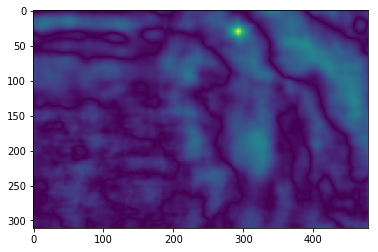

In [246]:
ir, ic = img.shape
tr, tc = template.shape

score = np.zeros((ir - tr, ic - tc))

for r in range(ir - tr):
    for c in range(ic - tc):
        match = img[r:r+tr, c:c+tc]
        score[r, c] = correlation_coefficient(template, match)

plt.imshow(score)
plt.show()

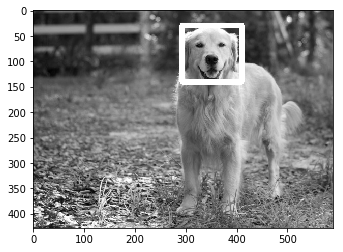

In [269]:
idx = np.unravel_index(np.argmax(score), score.shape)
top_left = (idx[1], idx[0])
bottom_right = (top_left[0] + tr, top_left[1] + tc)

result = cv2.rectangle(img, top_left, bottom_right, 255, 10)

plt.imshow(result, 'gray')
plt.show()

## 연습 문제  
  
1. 앞에서 얻었던 'thresholding_example.jpg' 이미지로 스케이트보드들만 따로 빼내어 보자 